In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, VarianceThreshold

In [23]:
df = pd.read_csv('Data/Pipeline_data_toy.csv', index_col=[0])
df_bin = pd.read_csv('Data/Pipeline_data_toy_bin.csv', index_col=[0])
df_cat = pd.read_csv('Data/Pipeline_data_toy_cat.csv', index_col=[0])
df.head()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,46.3,0.0,2183.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0
1,25.5,0.0,3280.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,...,1.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0
2,21.8,0.0,2410.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0
3,22.7,0.0,3544.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,...,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0
4,34.0,3.0,2778.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0


In [26]:
X_reg = df.drop(['birthweight_g'], axis=1)
y_reg = df['birthweight_g']

X_bin = df_bin.drop(['birthweight_bin'], axis=1)
y_bin = df_bin['birthweight_bin']

X_cat = df_cat.drop(['birthweight_cat'], axis=1)
y_cat = df_cat['birthweight_cat']

* Variance threshold used to remove low variance features (i.e. birth time which won't be contributing to our model)

In [63]:
selector = VarianceThreshold(threshold = 0.1)
X_reg_new = selector.fit_transform(X_reg)

In [64]:
X_reg_new.shape

(10000, 33)

In [65]:
X_reg.columns

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_dead',
       'prior_births_living', 'prior_terminations', 'prepreg_weight',
       'num_prev_cesareans', 'time_since_menses', 'birth_attendant',
       'birth_place', 'birth_mn', 'birth_dy', 'f_education', 'f_hispanic',
       'f_race6', 'gonorrhea', 'labour_induced', 'm_nativity', 'm_education',
       'm_hispanic', 'admit_icu', 'm_race6', 'm_transferred', 'infections',
       'm_morbidity', 'riskf', 'payment', 'mn_prenatalcare_began',
       'delivery_method', 'res_status', 'prev_cesarean', 'infant_sex',
       'weight_change'],
      dtype='object')

In [66]:
features = X_reg.columns
features[selector.get_support()]

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_living',
       'prior_terminations', 'prepreg_weight', 'num_prev_cesareans',
       'time_since_menses', 'birth_attendant', 'birth_place', 'birth_mn',
       'birth_dy', 'f_education', 'f_hispanic', 'f_race6', 'labour_induced',
       'm_nativity', 'm_education', 'm_hispanic', 'm_race6', 'riskf',
       'payment', 'mn_prenatalcare_began', 'delivery_method', 'res_status',
       'prev_cesarean', 'infant_sex', 'weight_change'],
      dtype='object')

* Feature selection on all data 

In [38]:
fs_reg = SelectKBest(score_func=mutual_info_regression, k=10)
X_reg_new = fs_reg.fit_transform(X_reg, y_reg)

fs_bin = SelectKBest(score_func=mutual_info_classif, k=10)
X_bin_new = fs_bin.fit_transform(X_bin, y_bin)

fs_cat = SelectKBest(score_func=mutual_info_classif, k=10)
X_cat_new = fs_cat.fit_transform(X_cat, y_cat)

In [39]:
features_reg = X_reg.columns
features_reg[fs_reg.get_support()]

Index(['bmi', 'm_deliveryweight', 'num_prenatal_visits', 'prepreg_weight',
       'time_since_menses', 'gonorrhea', 'm_race6', 'riskf', 'delivery_method',
       'weight_change'],
      dtype='object')

In [40]:
features_bin = X_bin.columns
features_bin[fs_bin.get_support()]

Index(['m_deliveryweight', 'num_prenatal_visits', 'num_prev_cesareans',
       'time_since_menses', 'f_race6', 'admit_icu', 'm_race6',
       'delivery_method', 'prev_cesarean', 'weight_change'],
      dtype='object')

In [41]:
features_cat = X_cat.columns
features_cat[fs_cat.get_support()]

Index(['m_height_in', 'num_prenatal_visits', 'prepreg_weight',
       'time_since_menses', 'birth_place', 'm_transferred', 'infections',
       'mn_prenatalcare_began', 'delivery_method', 'prev_cesarean'],
      dtype='object')

* PCA on numeric data

In [5]:
X_scaled = StandardScaler().fit_transform(X)

In [6]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [7]:
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scaled)

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09405914, 0.074233  , 0.07073821, 0.04713657, 0.04265277])

In [9]:
#These 5 principal components only explain 14% of the variance.. not good 
sum(explained_variance)*100

32.88196936640599

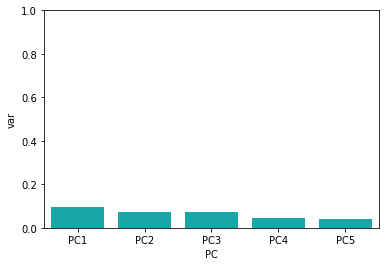

In [10]:
pca_df = pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

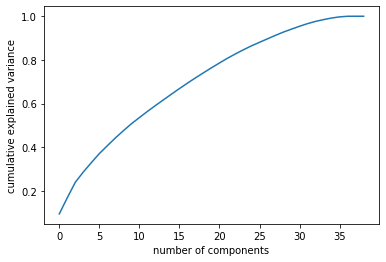

In [11]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* Could try randomised PCA etc.?